<a href="https://colab.research.google.com/github/Gotchs/ASE/blob/main/6_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Видео урок: https://www.youtube.com/watch?v=VzkvJRIzIVI
*   Оригинал файла: https://colab.research.google.com/drive/1xbR2fz7_zQuYVACYQJtSaQ23rqBiyVBK

## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных Boston Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.


In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

**Просмотр данных**

In [ ]:
n = 51
print(x_train[n]) #дом
print(y_train[n]) #его цена

[ 14.4208   0.      18.1      0.       0.74     6.461   93.3      2.0026
  24.     666.      20.2     27.49    18.05  ]
9.6


In [ ]:
print(x_train.shape)

(404, 13)


**Стандартизация данных**

Вычитаем среднее значение и делим на стандартное отклонение


In [ ]:
# Среднее значение
mean = x_train.mean(axis=0)

# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

In [ ]:
# Приводим значения в диапазон от 0 до 1
min_y = y_train.min()
max_y = y_train.max()

y_train = (y_train - min_y) / (max_y - min_y) #отклонение от минимума к амплитуде
y_test = (y_test - min_y) / (max_y - min_y)

In [ ]:
# Нормированные данные
print(x_train[n])
print(y_train[n])

[ 1.15671829 -0.48361547  1.0283258  -0.25683275  1.5590902   0.27354487
  0.87039709 -0.8569662   1.67588577  1.5652875   0.78447637 -3.48204219
  0.73274979]
9.6


## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [ ]:
print(model.summary()) # архитектура нашей модели

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [ ]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Train on 363 samples, validate on 41 samples
Epoch 1/100
363/363 - 0s - loss: 0.0809 - mean_absolute_error: 0.2037 - val_loss: 0.0279 - val_mean_absolute_error: 0.1272
Epoch 2/100
363/363 - 0s - loss: 0.0257 - mean_absolute_error: 0.1198 - val_loss: 0.0099 - val_mean_absolute_error: 0.0720
Epoch 3/100
363/363 - 0s - loss: 0.0171 - mean_absolute_error: 0.0968 - val_loss: 0.0110 - val_mean_absolute_error: 0.0769
Epoch 4/100
363/363 - 0s - loss: 0.0129 - mean_absolute_error: 0.0867 - val_loss: 0.0086 - val_mean_absolute_error: 0.0686
Epoch 5/100
363/363 - 0s - loss: 0.0105 - mean_absolute_error: 0.0784 - val_loss: 0.0096 - val_mean_absolute_error: 0.0729
Epoch 6/100
363/363 - 0s - loss: 0.0093 - mean_absolute_error: 0.0724 - val_loss: 0.0112 - val_mean_absolute_error: 0.0823
Epoch 7/100
363/363 - 0s - loss: 0.0073 - mean_absolute_error: 0.0624 - val_loss: 0.0090 - val_mean_absolute_error: 0.0674
Epoch 8/100
363/363 - 0s - loss: 0.0067 - mean_absolute_error: 0.0593 - val_loss: 0.0098 - val

In [ ]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten() 

# Возвращаем к прежнему размеру
pred = pred * (max_y - min_y) + min_y 
y_test = y_test * (max_y - min_y) + min_y
 
# Средний модуль отклонения  
err = sum(abs(pred - y_test)) / len(pred)

In [ ]:
print(err) #вывести ошибку

2.4119561382368495


In [ ]:
# Средняя цена по выборке
print(sum(y_test)/len(y_test)) 

23.07843137254902


In [ ]:
# Предсказание vs правильный ответ
for i in range(len(pred)):
  print("Сеть сказала: ", round(pred[i],2), ", а верный ответ: ", round(y_test[i],2))

Сеть сказала:  10.5 , а верный ответ:  7.2
Сеть сказала:  18.81 , а верный ответ:  18.8
Сеть сказала:  21.68 , а верный ответ:  19.0
Сеть сказала:  41.36 , а верный ответ:  27.0
Сеть сказала:  24.14 , а верный ответ:  22.2
Сеть сказала:  24.96 , а верный ответ:  24.5
Сеть сказала:  32.27 , а верный ответ:  31.2
Сеть сказала:  23.53 , а верный ответ:  22.9
Сеть сказала:  19.95 , а верный ответ:  20.5
Сеть сказала:  21.4 , а верный ответ:  23.2
Сеть сказала:  21.38 , а верный ответ:  18.6
Сеть сказала:  17.35 , а верный ответ:  14.5
Сеть сказала:  17.36 , а верный ответ:  17.8
Сеть сказала:  44.22 , а верный ответ:  50.0
Сеть сказала:  25.58 , а верный ответ:  20.8
Сеть сказала:  22.96 , а верный ответ:  24.3
Сеть сказала:  25.58 , а верный ответ:  24.2
Сеть сказала:  20.85 , а верный ответ:  19.8
Сеть сказала:  21.11 , а верный ответ:  19.1
Сеть сказала:  24.37 , а верный ответ:  22.7
Сеть сказала:  13.64 , а верный ответ:  12.0
Сеть сказала:  13.52 , а верный ответ:  10.2
Сеть сказала:

## Визуализация качества обучения

In [ ]:
# Считаем графики ошибки
plt.plot(history.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [ ]:
pred = model.predict(x_test).flatten() # Возвращается копия предсказания в виде одномерного массива
pred = pred * (max_y - min_y) + min_y # Приводим к правильному размеру

In [ ]:
print(pred) # Посмотрим предсказание

[10.496517  18.814617  21.683472  41.36111   24.140724  24.960276
 32.26851   23.532389  19.953838  21.395378  21.384392  17.35035
 17.357895  44.224545  25.580988  22.961464  25.584091  20.845749
 21.10512   24.37479   13.643818  13.520034  23.504147  15.9080305
 20.911821  24.090288  29.170582  28.65779   13.107441  21.022257
 19.69126   17.449745  31.056843  25.028097  23.316082  10.159817
 19.364285  20.257648  19.312729  28.246029  29.97897   29.391405
 15.240647  44.22715   29.531818  28.850248  28.519186  20.191124
 26.804167  24.579329  37.094856  19.191912  12.854351  14.999163
 39.29447   28.689653  12.646486  48.360493  33.979736  23.183266
 23.713924  16.198044  17.88131   21.086504  24.683254  21.935612
 15.796451  22.80357   15.644606   9.519339  23.05754   30.373295
 24.562891  16.082073  26.08743   20.915133  20.67268   26.663393
 37.206463  12.027998  23.558647  41.00388   18.404926  14.9813795
 19.536566  18.848099  27.058083  20.85292   24.564705  26.967627
 19.02351

**Печатаем примеры результатов**

In [ ]:
test_index = 2
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 21.683472 , правильная стоимость: 19.0


## Визуализируем результаты предсказаний

График предсказаний

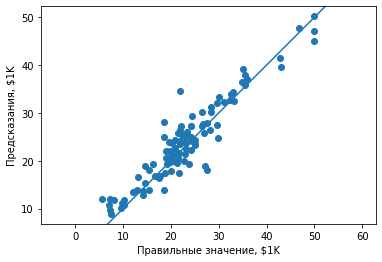

In [ ]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

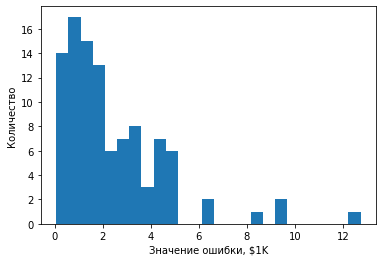

In [ ]:
#Разность предсказанного и правильного ответа
error = pred - y_test

#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()